# Power Plant Output Prediction

**(Paramesh.T)**

About the dataset
The data points were collected from a Combined Cycle Power Plant over 6 years (2006-2011) when the power plant was set to work with a full load. Features consist of hourly average ambient variables - Ambient Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE) of the plant.

A combined-cycle power plant uses both gas and a steam turbine together to produce up to 50 percent more electricity from the same fuel than a traditional simple-cycle plant. The waste heat from the gas turbine is routed to the nearby steam turbine, which generates extra power.

All the UN Member States have to submit a report on the combined cycle power plant to the United Nations. The Power Plant officials of Mexico are devising a way to predict the net hourly electrical energy output (PE) of the plant.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv(r'C:\Users\PARAMESH\Desktop\ML Projects\projects\Datasets\Power_plant.csv')

In [3]:
dataset

,AT,EV,AP,RH,PE
0,29.95,73.42,1011.44,66.32,432.81
1,5.76,40.07,1013.22,62.99,494.67
2,29.44,64.33,1011.40,61.78,442.32
3,32.83,74.33,1011.44,50.42,427.36
4,16.86,39.63,1004.47,83.50,466.68
...,...,...,...,...,...
6405,23.39,61.87,1010.35,48.91,444.03
6406,11.63,40.55,1022.89,87.12,474.67
6407,27.79,69.23,1012.86,45.71,435.06
6408,12.26,41.50,1014.87,89.41,471.13


In [4]:
dataset.shape

(6410, 5)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      6410 non-null   float64
 1   EV      6410 non-null   float64
 2   AP      6410 non-null   float64
 3   RH      6410 non-null   float64
 4   PE      6410 non-null   float64
dtypes: float64(5)
memory usage: 250.5 KB


In [6]:
dataset.isnull().sum()

AT    0
EV    0
AP    0
RH    0
PE    0
dtype: int64

In [7]:
dataset.describe()

,AT,EV,AP,RH,PE
count,6410.000000,6410.000000,6410.000000,6410.000000,6410.000000
mean,19.652120,54.298786,1013.227959,73.324212,454.363276
std,7.433792,12.685055,5.932562,14.675569,17.060129
min,1.810000,25.360000,992.890000,26.300000,420.260000
25%,13.580000,41.760000,1009.070000,63.352500,439.832500
50%,20.420000,52.080000,1012.955000,74.980000,451.440000
75%,25.720000,66.540000,1017.257500,84.897500,468.270000
max,35.560000,81.560000,1033.300000,100.160000,495.760000


In [8]:
dataset.corr()

,AT,EV,AP,RH,PE
AT,1.000000,0.842640,-0.507147,-0.547406,-0.948487
EV,0.842640,1.000000,-0.413284,-0.310806,-0.869070
AP,-0.507147,-0.413284,1.000000,0.110869,0.514595
RH,-0.547406,-0.310806,0.110869,1.000000,0.393906
PE,-0.948487,-0.869070,0.514595,0.393906,1.000000


<AxesSubplot:>

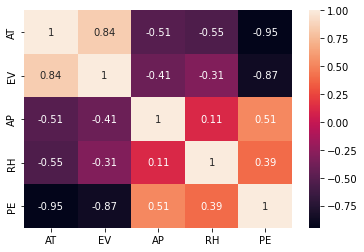

In [9]:
sns.heatmap(dataset.corr(),annot=True)

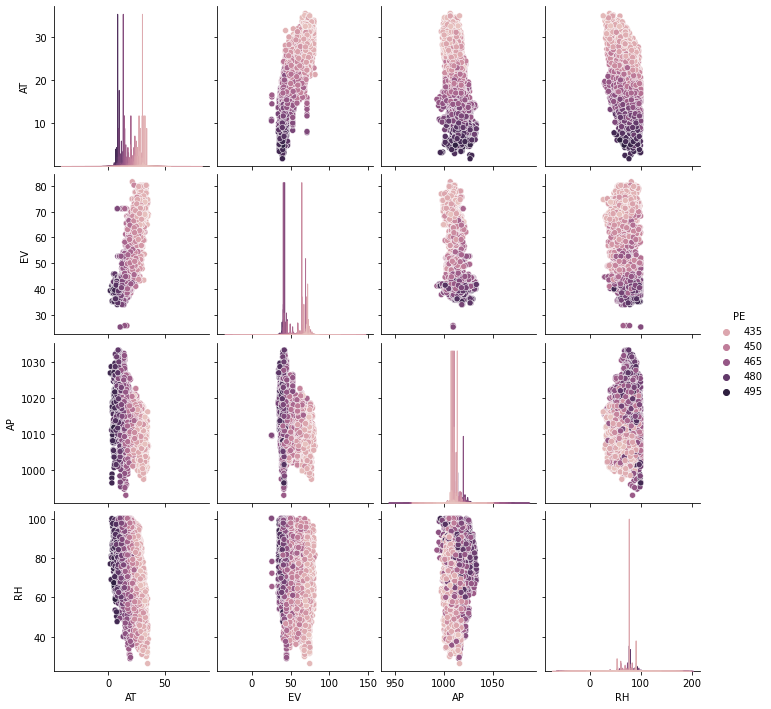

In [10]:
sns.pairplot(dataset,hue = 'PE')

<AxesSubplot:xlabel='EV', ylabel='PE'>

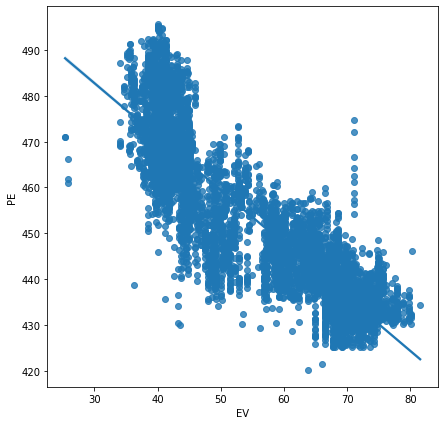

In [11]:
plt.figure(figsize=(7,7))
sns.regplot(data=dataset, x='EV', y='PE', scatter=True, fit_reg=True)

In [ ]:
plt.figure(figsize=(7,7))
sns.catplot(data=dataset, x="EV", y="PE")

In [ ]:
dataset.columns

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

In [ ]:
print(y)

In [ ]:
y=y.reshape(len(y),1)

In [ ]:
print(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

In [ ]:
lin_score=r2_score(y_test, y_pred)

# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

In [ ]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
poly_score=r2_score(y_test, y_pred)

# Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

In [ ]:
svm_score = r2_score(y_test, y_pred)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

In [ ]:
tree_score=r2_score(y_test, y_pred)

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

In [ ]:
forest_score=r2_score(y_test, y_pred)

# XG Boost

In [40]:
!pip install xgboost==1.6.2

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [41]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(verbosity=0)
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [42]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[466.98 463.96]
 [462.82 464.44]
 [481.74 485.38]
 ...
 [472.97 475.61]
 [441.1  437.27]
 [435.84 433.42]]


In [43]:
from sklearn.metrics import r2_score
xgb_score = r2_score(y_test, y_pred)
r2_score(y_test, y_pred)

0.9529988650807741

In [44]:
models=pd.DataFrame({'Models':['LinearRegression', 'Poly_Regression','SVR', 'DecisionTreeRegressor', 'RandomForest','XGBoost'],'Score':[lin_score*100,poly_score*100,svm_score*100,tree_score*100,forest_score*100,xgb_score*100]})
models

,Models,Score
0,LinearRegression,92.476912
1,Poly_Regression,93.524743
2,SVR,26.328578
3,DecisionTreeRegressor,92.227035
4,RandomForest,95.299887
5,XGBoost,95.299887


**Random Forest Regressor is the suitable model for this Dataset**

**Using Random Forest model we are able to achieve 95.29% accuracy for this Dataset**